In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data = pd.DataFrame({'День': ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'],
                     'Улица': [80, 98, 75, 91, 78],
                     'Гараж': [100, 82, 105, 89, 102]})
data

,День,Улица,Гараж
0,Понедельник,80,100
1,Вторник,98,82
2,Среда,75,105
3,Четверг,91,89
4,Пятница,78,102


In [4]:
np.corrcoef(data['Улица'], data['Гараж'])

array([[ 1., -1.],
       [-1.,  1.]])

In [5]:
cr = data['Улица'].corr(data['Гараж'])
cr

-0.9999999999999998

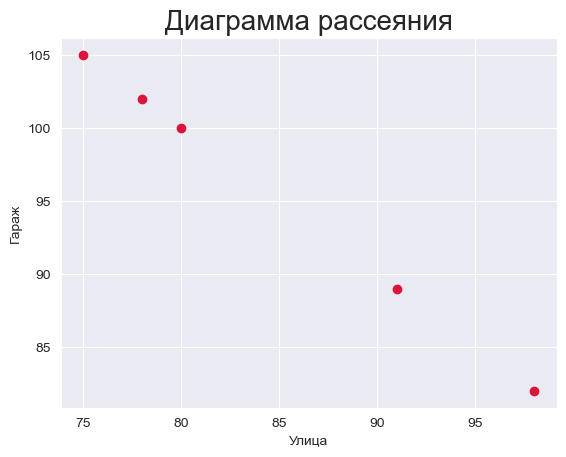

In [6]:
plt.grid(True)
plt.title('Диаграмма рассеяния', fontsize=20)
plt.xlabel('Улица')
plt.ylabel('Гараж')
plt.scatter(data['Улица'], data['Гараж'], marker='o', color='crimson')

In [41]:
bitcoin = pd.read_csv('../data/bitcoin.csv')
bitcoin = bitcoin.iloc[:,bitcoin.columns!='Unnamed: 0']
bitcoin = bitcoin.iloc[:,bitcoin.columns!='time']
bitcoin

,high,low,open,volumefrom,volumeto,close
0,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...
1996,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


In [42]:
drop_bitcoin = bitcoin.tail(14)
drop_bitcoin

,high,low,open,volumefrom,volumeto,close
1987,37307.10,33666.06,35680.92,60616.25,2.127790e+09,34611.58
1988,36481.62,33400.65,34611.58,37522.16,1.325408e+09,35662.59
1989,37512.80,34202.86,35662.59,50306.62,1.821663e+09,37290.83
1990,37910.19,35733.52,37290.83,44444.78,1.626269e+09,36683.51
1991,38225.18,35935.34,36683.51,39948.44,1.494571e+09,37576.98
1992,39482.46,37199.92,37576.98,41098.93,1.586641e+09,39229.66
1993,39273.49,35617.03,39229.66,49661.48,1.837944e+09,36861.50
1994,37911.76,34846.16,36861.50,39864.17,1.444089e+09,35538.40
1995,36453.81,35264.34,35538.40,27469.69,9.862751e+08,35798.57
1996,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86


In [9]:
bitcoin.drop(bitcoin.tail(14).index,inplace=True)
bitcoin

,time,high,low,open,volumefrom,volumeto,close
0,20151220,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,20151221,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,20151222,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,20151223,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,20151224,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...
1982,20210524,39945.35,34467.32,34716.84,106765.14,3.981461e+09,38837.76
1983,20210525,39842.90,36509.09,38837.76,66530.67,2.529569e+09,38387.36
1984,20210526,40854.81,37855.81,38387.36,66483.59,2.607760e+09,39295.08
1985,20210527,40408.95,37211.84,39295.08,46474.62,1.804037e+09,38538.84


In [10]:
test = drop_bitcoin
train = bitcoin

In [11]:
def split_xy(df):
    X = DataFrame(df, columns=['time', 'high', 'low', 'open', 'volumefrom', 'volumeto'])
    y = DataFrame(df, columns=['close'])
    return X,y

In [12]:
regression = LinearRegression()
X_train,y_train = split_xy(train)
regression.fit(X_train,y_train)

LinearRegression()

In [13]:
X_test, y_test = split_xy(test)
predictions = regression.predict(X_test)
y_test.assign(predictions=predictions)

,close,predictions
1987,34611.58,35635.329209
1988,35662.59,35198.303732
1989,37290.83,36126.916121
1990,36683.51,36693.843383
1991,37576.98,37339.335661
1992,39229.66,38774.423438
1993,36861.50,36803.390347
1994,35538.40,36264.799897
1995,35798.57,35967.093520
1996,33582.86,34938.181686


In [14]:
r2_score(y_test, predictions)

0.7575781340756563

In [15]:
regression.coef_

array([[ 2.28093683e-04,  7.75877195e-01,  6.80017430e-01,
        -4.63811394e-01, -8.01129448e-04,  1.62696369e-07]])

In [16]:
regression.intercept_

array([-4562.20549055])

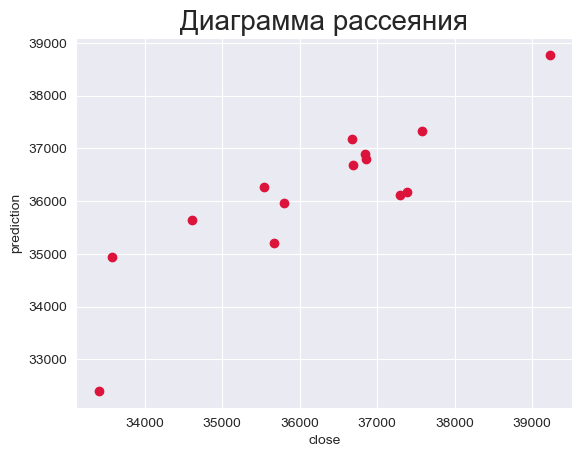

In [17]:
plt.grid(True)
plt.title('Диаграмма рассеяния', fontsize=20)
plt.xlabel('close')
plt.ylabel('prediction')
plt.scatter(y_test, predictions, marker='o', color='crimson')

In [18]:
house = pd.read_csv("../data/housePrice.csv")
house

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [19]:
house = house.iloc[:,house.columns!='Price']
house.isna().mean() * 100

Area          0.00000
Room          0.00000
Parking       0.00000
Warehouse     0.00000
Elevator      0.00000
Address       0.66111
Price(USD)    0.00000
dtype: float64

In [20]:
house['Address'].nunique()

192

In [21]:
house.Address.fillna(house.Address.describe().top, inplace=True)
house.isna().mean() * 100

C:\Users\Alexey\AppData\Local\Temp\ipykernel_10376\2319160510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house.Address.fillna(house.Address.describe().top, inplace=True)


Area          0.0
Room          0.0
Parking       0.0
Warehouse     0.0
Elevator      0.0
Address       0.0
Price(USD)    0.0
dtype: float64

In [22]:
house.Area.unique()

array(['63', '60', '79', '95', '123', '70', '87', '59', '54', '71', '68',
       '64', '136', '155', '140', '42', '93', '65', '99', '105', '160',
       '77', '110', '100', '90', '49', '96', '67', '62', '55', '129',
       '109', '58', '150', '130', '88', '51', '113', '98', '75', '61',
       '72', '122', '215', '101', '53', '74', '114', '151', '300', '76',
       '148', '40', '128', '94', '97', '137', '85', '78', '48', '82',
       '120', '139', '66', '80', '44', '50', '121', '141', '127', '180',
       '158', '144', '245', '190', '108', '117', '200', '125', '236',
       '220', '86', '84', '106', '320', '154', '210', '124', '83', '270',
       '104', '103', '165', '135', '132', '81', '153', '166', '175',
       '170', '115', '118', '116', '43', '230', '91', '126', '450', '500',
       '145', '112', '192', '164', '265', '92', '143', '350', '335',
       '235', '225', '221', '312', '188', '198', '650', '179', '256',
       '257', '167', '246', '168', '280', '69', '400', '660', '213', '

In [23]:
house.duplicated().sum()

208

In [24]:
house = house.drop_duplicates()
house.duplicated().sum()

0

In [25]:
house.sample(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
2419,115,2,True,True,True,Saadat Abad,200000.00
3455,80,2,False,True,True,Shahryar,13666.67
330,350,3,True,True,True,Zaferanieh,1750000.00
737,145,3,True,True,True,Dezashib,410000.00
302,60,1,True,True,False,Southern Janatabad,76000.00
217,132,3,True,True,True,Gheitarieh,208333.33
2125,68,2,True,True,True,Shahr-e-Ziba,71666.67
1794,119,2,True,True,True,Shahran,156666.67
840,145,3,True,True,True,Punak,253333.33
3129,42,1,False,True,False,Shoosh,30666.67


In [26]:
house.replace(True, 1, inplace=True)
house.replace(False, 0, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3271 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3271 non-null   object 
 1   Room        3271 non-null   int64  
 2   Parking     3271 non-null   int64  
 3   Warehouse   3271 non-null   int64  
 4   Elevator    3271 non-null   int64  
 5   Address     3271 non-null   object 
 6   Price(USD)  3271 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 204.4+ KB


In [27]:
house['Area']

0        63
1        60
2        79
3        95
4       123
       ... 
3473     63
3474     86
3475     83
3477    105
3478     82
Name: Area, Length: 3271, dtype: object

In [28]:
house['Area'] = pd.to_numeric(house['Area'], errors='coerce', downcast='integer')
house = house.dropna()

In [29]:
house = pd.get_dummies(house, columns = ['Address'])
house

,Area,Room,Parking,Warehouse,Elevator,Price(USD),Address_Abazar,Address_Abbasabad,Address_Absard,Address_Abuzar,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,63.0,1,1,1,1,61666.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60.0,1,1,1,1,61666.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,2,1,1,1,18333.33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95.0,2,1,1,1,30083.33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123.0,2,1,1,1,233333.33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,63.0,1,1,1,0,63000.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3474,86.0,2,1,1,1,116666.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,83.0,2,1,1,1,226666.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,105.0,2,1,1,1,186666.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
house.isna().sum()

Area                   0
Room                   0
Parking                0
Warehouse              0
Elevator               0
                      ..
Address_Yousef Abad    0
Address_Zafar          0
Address_Zaferanieh     0
Address_Zargandeh      0
Address_Zibadasht      0
Length: 198, dtype: int64

In [31]:
class MyGradientLinearRegression:
    def __init__(self, fit_intercept=True, alpha=0.5):
        self.fit_intercept = fit_intercept
        self.alpha = alpha
        self.w = None

    def fit(self, X, y, lr=0.01, max_iter=100):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        n, k = X.shape
        # случайно инициализируем веса
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.fit_intercept else k)
        X_train_ = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X

        for iter_num in range(max_iter):
            y_pred = X_train_ @ self.w
            grad = self._calc_gradient(X_train_, y, y_pred)
            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            self.w -= lr * grad
        return self

    def _calc_gradient(self, X, y, y_pred):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        grad = grad.mean(axis=0)
        return grad

    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        n, k = X.shape
        X_train_ = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        y_pred = X_train_ @ self.w
        return y_pred

In [47]:
from sklearn.model_selection import train_test_split
target_col = 'Price(USD)'

X_train, X_test, y_train, y_test = train_test_split(house.iloc[:,house.columns!=target_col], house[target_col], test_size=0.2)

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), MyGradientLinearRegression(fit_intercept=True, alpha=0.5))
model.fit(X_train, y_train)

C:\Users\Alexey\AppData\Local\Temp\ipykernel_10376\3297582041.py:30: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  grad = 2 * (y_pred - y)[:, np.newaxis] * X


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mygradientlinearregression',
                 <__main__.MyGradientLinearRegression object at 0x0000018C77948100>)])

In [49]:
r2_score(y_test, model.predict(X_test))

0.575761041747916

In [36]:
model.get_params()['mygradientlinearregression'].w

array([ 9.03837240e+04,  4.85497470e+04,  2.83666483e+03,  2.61380376e+03,
       -1.50096421e+03,  4.62639865e+03, -3.41881329e+02, -2.04956909e+04,
       -1.72229291e+02, -2.83760500e+03, -4.16206923e+02, -3.01439156e+03,
        9.21502955e+03,  3.25451073e-01, -2.03576271e+03, -6.84383036e+01,
       -4.05502446e+03, -4.37242700e+03, -1.69349849e+04,  2.08778217e+04,
        3.59289596e+03,  1.31538517e+00, -3.34429640e+03, -2.61526190e+03,
       -4.41974932e+03, -1.59533451e+03, -5.47477641e+03, -1.55716872e+03,
       -1.88746612e+03, -3.78591140e+03,  5.01982479e-01, -5.33459928e+03,
       -1.62245128e+03, -3.02735414e+03, -2.74874716e-01,  1.32790106e+03,
       -1.86166555e+04,  6.41303711e+02, -9.00887565e+02,  3.81594631e-01,
       -2.58961767e+03, -3.42991992e+03,  3.64891869e+03, -1.90044173e+03,
        8.07762196e+03, -4.62257100e+03, -2.38610496e+03,  1.83698383e+01,
        8.45804982e+03,  3.37493595e+04, -1.33041776e+03,  3.59636498e-01,
       -2.51645003e+03, -

In [38]:
model.get_params()['mygradientlinearregression'].w[-1]

134425.81520557182